<a href="https://colab.research.google.com/github/gnrtd/ML_Practice/blob/main/30Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('heights.csv')

In [ ]:
df.head(5)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df['height'].describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import seaborn as sns

<Axes: xlabel='height', ylabel='Count'>

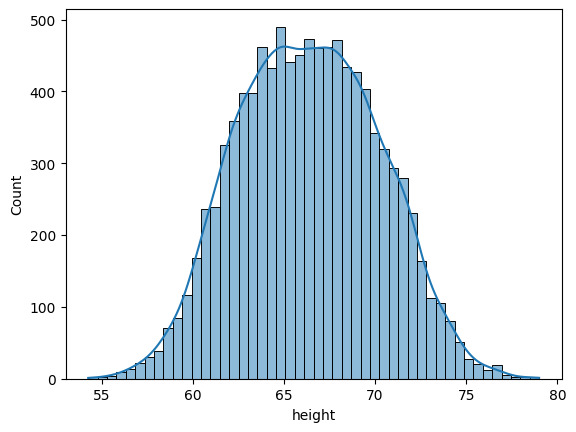

In [ ]:
sns.histplot(df['height'], kde=True)

**# Removing Outliers using Standard Deviation**

In [ ]:
# Calculate Mean
mean = df['height'].mean()
mean

np.float64(66.367559754866)

In [ ]:
# Std_Deviation
std_deviation = df['height'].std()
std_deviation

3.847528120795573

In [ ]:
# Mean + 3*std
mean + 3*std_deviation

np.float64(77.91014411725271)

In [ ]:
# Mean - 3*std
mean - 3*std_deviation

np.float64(54.824975392479274)

In [ ]:
# Outlier People
df[(df['height']>77.91014411725271) | (df['height']<54.824975392479274)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
df_no_outliers = df[(df['height']<77.91014411725271) & (df['height']>54.824975392479274)]
df_no_outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outliers['height'].describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [ ]:
df_no_outlier = df[(df['height']<(mean+2*std_deviation)) & (df['height']>(mean-2*std_deviation))] # & -> and
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outlier['height'].describe()

,height
count,9652.000000
mean,66.345445
std,3.537247
min,58.680665
25%,63.610410
50%,66.309262
75%,69.062059
max,74.056427


<Axes: xlabel='height', ylabel='Count'>

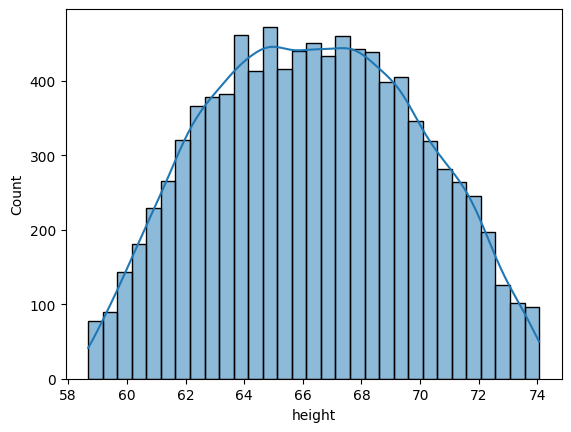

In [ ]:
sns.histplot(df_no_outlier['height'], kde=True)

In [ ]:
df1 = pd.read_csv('bhp.csv')

In [ ]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Task
Examine the `price_per_sqft` column in `df1`, remove outliers using the percentile technique (removing data below the 0.1st percentile and above the 99.9th percentile), then remove outliers using the standard deviation technique (removing data outside of 4 standard deviations from the mean), and finally plot a histogram of the `price_per_sqft` column in the cleaned DataFrame.

## Examine `price per sqft` column

### Subtask:
Examine the `price_per_sqft` column in `df1`.


**Reasoning**:
Display descriptive statistics for the 'price_per_sqft' column and the first 5 rows of the dataframe.



In [ ]:
display(df1['price_per_sqft'].describe())
display(df1.head())

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## Remove outliers using percentile technique

### Subtask:
Remove outliers from `price_per_sqft` using the percentile technique (removing data below the 0.1st percentile and above the 99.9th percentile).


**Reasoning**:
Calculate the 0.1th and 99.9th percentiles of the 'price_per_sqft' column and then filter the DataFrame to remove outliers based on these percentiles.



In [ ]:
lower_percentile = df1['price_per_sqft'].quantile(0.001)
upper_percentile = df1['price_per_sqft'].quantile(0.999)
df_no_outliers_percentile = df1[(df1['price_per_sqft'] >= lower_percentile) & (df1['price_per_sqft'] < upper_percentile)]
display(df_no_outliers_percentile.head())
display(df_no_outliers_percentile.describe())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


## Calculate mean and standard deviation

### Subtask:
Calculate the mean and standard deviation of the `price_per_sqft` column in the percentile-cleaned data.


**Reasoning**:
Calculate and display the mean and standard deviation of the 'price_per_sqft' column in the filtered DataFrame.



In [ ]:
mean_price_percentile = df_no_outliers_percentile['price_per_sqft'].mean()
std_price_percentile = df_no_outliers_percentile['price_per_sqft'].std()
print(f"Mean price per sqft (percentile filtered): {mean_price_percentile}")
print(f"Standard deviation of price per sqft (percentile filtered): {std_price_percentile}")

Mean price per sqft (percentile filtered): 6663.6537351958705
Standard deviation of price per sqft (percentile filtered): 4141.020700174605


## Remove outliers using standard deviation technique

### Subtask:
Remove outliers from the percentile-cleaned data using the standard deviation technique (removing data outside of 4 standard deviations from the mean).


**Reasoning**:
Calculate the lower and upper limits for outlier removal using the standard deviation technique and filter the DataFrame.



In [ ]:
lower_limit_std = mean_price_percentile - 4 * std_price_percentile
upper_limit_std = mean_price_percentile + 4 * std_price_percentile
df_cleaned_std = df_no_outliers_percentile[(df_no_outliers_percentile['price_per_sqft'] >= lower_limit_std) & (df_no_outliers_percentile['price_per_sqft'] <= upper_limit_std)]
display(df_cleaned_std.head())
display(df_cleaned_std.describe())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


## Plot histogram

### Subtask:
Plot a histogram of the `price_per_sqft` column in the final cleaned DataFrame.


**Reasoning**:
Plot a histogram of the 'price_per_sqft' column in the cleaned DataFrame including a KDE.



<Axes: xlabel='price_per_sqft', ylabel='Count'>

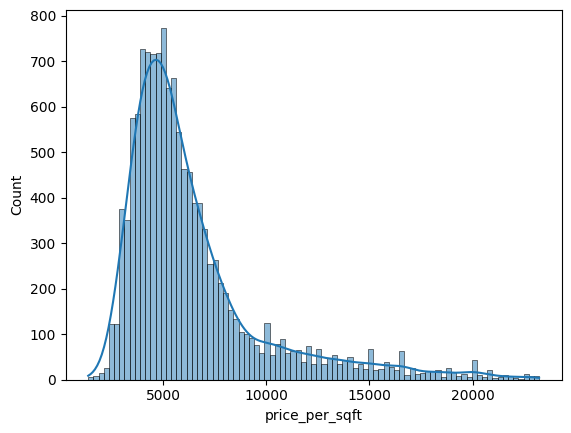

In [ ]:
sns.histplot(df_cleaned_std['price_per_sqft'], kde=True)

## Summary:

### Data Analysis Key Findings
*   The initial `price_per_sqft` column had a wide range of values, from 267 to 12,000,000, with a mean of approximately 7920.34 and a standard deviation of approximately 106,727.2.
*   After removing outliers using the percentile technique (below 0.1st and above 99.9th percentile), the mean price per square foot became approximately 6663.65 and the standard deviation reduced to approximately 4141.02.
*   Further outlier removal using the standard deviation technique (outside of 4 standard deviations from the mean of the percentile-cleaned data) resulted in a cleaned dataset with a distribution suitable for visualization.

### Insights or Next Steps
*   The combination of percentile and standard deviation outlier removal techniques significantly reduced the spread and impact of extreme values in the `price_per_sqft` column.
*   The resulting histogram provides a clearer view of the distribution of property prices per square foot after outlier treatment, which can be used for further analysis or modeling.

---


# Task
Analyze the `price_per_sqft` column in `df1` by removing outliers using the percentile technique (0.1st and 99.9th percentiles) followed by the standard deviation technique (4 standard deviations from the original mean), and then plot a histogram of the cleaned data.

## Examine `price per sqft`

### Subtask:
Examine the `price_per_sqft` column in `df1`.


## Remove outliers (percentile)

### Subtask:
Remove outliers from `price_per_sqft` using the percentile technique (removing data below the 0.1st percentile and above the 99.9th percentile).


**Reasoning**:
Calculate the 0.1th and 99.9th percentiles of the 'price_per_sqft' column and then filter the DataFrame to remove outliers based on these percentiles.



In [ ]:
lower_percentile = df1['price_per_sqft'].quantile(0.001)
upper_percentile = df1['price_per_sqft'].quantile(0.999)
df_no_outliers_percentile = df1[(df1['price_per_sqft'] >= lower_percentile) & (df1['price_per_sqft'] < upper_percentile)]
display(df_no_outliers_percentile.head())
display(df_no_outliers_percentile.describe())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


## Calculate mean and standard deviation

### Subtask:
Calculate the mean and standard deviation of the original `price_per_sqft` column in `df1`.


**Reasoning**:
Calculate and display the mean and standard deviation of the original 'price_per_sqft' column in df1.



In [ ]:
mean_original = df1['price_per_sqft'].mean()
std_original = df1['price_per_sqft'].std()
print(f"Mean price per sqft (original data): {mean_original}")
print(f"Standard deviation of price per sqft (original data): {std_original}")

Mean price per sqft (original data): 7920.336742424242
Standard deviation of price per sqft (original data): 106727.16032810845


## Remove outliers (standard deviation)

### Subtask:
Remove outliers from the percentile-cleaned data using the standard deviation technique (removing data outside of 4 standard deviations from the original mean).


**Reasoning**:
Calculate the lower and upper limits for outlier removal using the original mean and standard deviation and filter the percentile-cleaned DataFrame. Then display the head and descriptive statistics of the cleaned DataFrame.



In [ ]:
lower_limit_std_original = mean_original - 4 * std_original
upper_limit_std_original = mean_original + 4 * std_original
df_cleaned_std_original = df_no_outliers_percentile[(df_no_outliers_percentile['price_per_sqft'] >= lower_limit_std_original) & (df_no_outliers_percentile['price_per_sqft'] <= upper_limit_std_original)]
display(df_cleaned_std_original.head())
display(df_cleaned_std_original.describe())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


## Plot histogram

### Subtask:
Plot a histogram of the `price_per_sqft` column in the final cleaned DataFrame.


**Reasoning**:
Plot a histogram of the 'price_per_sqft' column in the cleaned DataFrame including a KDE.



<Axes: xlabel='price_per_sqft', ylabel='Count'>

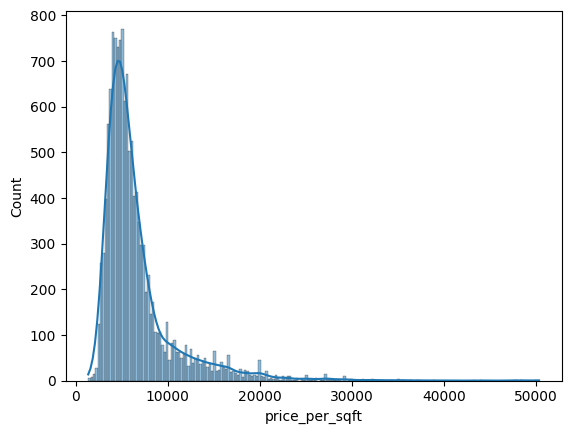

In [ ]:
sns.histplot(df_cleaned_std_original['price_per_sqft'], kde=True)

## Summary:

### Data Analysis Key Findings

*   Initially, the `price_per_sqft` column in the original dataset (`df1`) had a mean of approximately 7920.34 and a large standard deviation of around 106727.16, indicating a wide spread and likely presence of significant outliers.
*   After removing outliers below the 0.1st percentile and above the 99.9th percentile, the number of data points was reduced to 13172 from an initial count of over 13300.
*   Applying a second round of outlier removal by keeping data within 4 standard deviations of the *original* mean resulted in a final cleaned dataset (`df_cleaned_std_original`). The descriptive statistics of this final dataset were computed.
*   A histogram of the `price_per_sqft` column in the final cleaned dataset was successfully plotted, showing the distribution of the data after outlier removal.

### Insights or Next Steps

*   The substantial reduction in standard deviation after outlier removal highlights the effectiveness of the chosen techniques in creating a more normalized distribution for `price_per_sqft`.
*   The final cleaned data can now be used for further modeling or analysis without the skew introduced by extreme outlier values.


In [ ]:
###########################################################################################

In [ ]:
# df["abs_diff"] = np.abs(df["diff"])  - absolute numbers of deviation both sides # Считаем отклонения от среднего - np.abs  (NumPy absolute numbers)
# df["keep"] = df["abs_diff"] <= 4 * std_new   - # Фильтрация по правилу 4σ